### Biodiversity Data Analysis: Exploring Conservation Status and Species Observations in U.S. National Parks

**Importing Necessary Libraries For Project Performance**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Inspecting Data On Species Info And Observations**

In [2]:
species_info = pd.read_csv("species_info.csv")
print(species_info.head(10))

observations = pd.read_csv("observations.csv")
print(observations.head(10))

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   
5   Mammal         Odocoileus virginianus   
6   Mammal                     Sus scrofa   
7   Mammal                  Canis latrans   
8   Mammal                    Canis lupus   
9   Mammal                    Canis rufus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
5                                  White-Tailed Deer  

**Cleaning Species and Observations Datasets** 

In [3]:
#Printing all the columns in both datasets
print("These are my species_info columns")
print(species_info.columns)
print("These are my observations columns")
print(observations.columns)

These are my species_info columns
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
These are my observations columns
Index(['scientific_name', 'park_name', 'observations'], dtype='object')


In [4]:
# Applying the .shape method in pandas to identify the number of rows and columns in our datasets
print("The Species Dataset have the next number of rows and columns", species_info.shape)
print("The observations Dataset have the next number of rows and column", observations.shape)

The Species Dataset have the next number of rows and columns (5824, 4)
The observations Dataset have the next number of rows and column (23296, 3)


In [5]:
#Applying the .duplicated() and drop_duplicates() functions to remove duplicate rows

# Check for duplicates in species_info
check_species_duplicated = species_info.duplicated()
print("These are the number of duplicates in the species_info dataset")
print(check_species_duplicated.value_counts())
# Check for duplicates in observations
check_observations_duplicated = observations.duplicated()
print("These are the number of duplicates in the observations dataset")
print(check_observations_duplicated.value_counts())
# Drop duplicate rows
species_info = species_info.drop_duplicates()
observations = observations.drop_duplicates()
# Display final dataset shapes
print("Species dataset after eliminating duplicates:")
print("Rows and columns:", species_info.shape)
print("Observations dataset after eliminating duplicates:")
print("Rows and columns:", observations.shape)

These are the number of duplicates in the species_info dataset
False    5824
Name: count, dtype: int64
These are the number of duplicates in the observations dataset
False    23281
True        15
Name: count, dtype: int64
Species dataset after eliminating duplicates:
Rows and columns: (5824, 4)
Observations dataset after eliminating duplicates:
Rows and columns: (23281, 3)


**Performing Exploratory Data Anlysis**

In [6]:
#Identifying Data Type of each column with .dtypes
print("This is the data type of the dataset Species") 
print(species_info.dtypes)
print("This is the data type of the dataset Observations")
print(observations.dtypes)


This is the data type of the dataset Species
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object
This is the data type of the dataset Observations
scientific_name    object
park_name          object
observations        int64
dtype: object


In [7]:
#Calculating the unique number of values in dataset species_info with .nunique()
print("Unique values per column of the dataset Species")
print(species_info.nunique())
print("Unique values of the column conservation_status")
print(species_info["conservation_status"].unique())
print("Unique values of the column category")
print(species_info["category"].unique())


Unique values per column of the dataset Species
category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64
Unique values of the column conservation_status
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
Unique values of the column category
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [8]:
##Calculating the unique number of values in dataset observations with .nunique()
print("Unique values per column of the dataset Observations")
print(observations.nunique())
print("Unique values of the column park_name")
print(observations["park_name"].unique()) 

Unique values per column of the dataset Observations
scientific_name    5541
park_name             4
observations        304
dtype: int64
Unique values of the column park_name
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [9]:
# Counting the number of missing values in each dataset with .isna().sum()
print("Number of Missing Values in the dataset species per column:")
print(species_info.isna().sum())
print("Number of Missing Values in the dataset observations per column:")
print(observations.isna().sum())

Number of Missing Values in the dataset species per column:
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64
Number of Missing Values in the dataset observations per column:
scientific_name    0
park_name          0
observations       0
dtype: int64


In [10]:
## Calculate percentage of missing values in conservation_status column: 
species_info_count = species_info["conservation_status"].isna().sum()/len(species_info) *100
print(f"Percentage of missing values for conservation status: {species_info_count:.2f}%")

Percentage of missing values for conservation status: 96.72%


In [11]:
#Identifying number of missing value in the dataset Species by category with pd.crosstab
pd.crosstab(
    species_info["category"], 
    species_info["conservation_status"].isna(),
    rownames=["category"], 
     colnames = ['Conservation is NAN']) 

Conservation is NAN,False,True
category,,
Amphibian,7,73
Bird,79,442
Fish,11,116
Mammal,38,176
Nonvascular Plant,5,328
Reptile,5,74
Vascular Plant,46,4424


The category that we know less about in terms of conservation status are **Vascular Plants (4424 NaN)** and **Nonvascular Plants (328 NaN)**. Alongside with the category Birds, which has 442 NaN values on conservation status. NaN in this context means we lack info.

### Key Questions: 

### How are species observations distributed by biological category?

In [12]:
#Joining together both datasets observations and info through the column scientific_name. 
merged_df= pd.merge(observations,species_info, on="scientific_name")
#Quality Control for merge df:
#Basic Info: 
merged_df.info()
#Missing Values: 
print("Missing values per column:")
print(merged_df.isna().sum())
#Duplicates Row: 
print("Number of duplicated rows:")
print(merged_df.duplicated().sum())
print("Merged shape:", merged_df.shape)
print("Unique species after merge:", merged_df['scientific_name'].nunique())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25601 entries, 0 to 25600
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25601 non-null  object
 1   park_name            25601 non-null  object
 2   observations         25601 non-null  int64 
 3   category             25601 non-null  object
 4   common_names         25601 non-null  object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB
Missing values per column:
scientific_name            0
park_name                  0
observations               0
category                   0
common_names               0
conservation_status    24721
dtype: int64
Number of duplicated rows:
0
Merged shape: (25601, 6)
Unique species after merge: 5541


In [13]:
## Calculate percentage of missing values in conservation_status column: 
merged_df_count = merged_df["conservation_status"].isna().sum()/len(merged_df) *100
print(f"Percentage of missing values for conservation status on merged df:{merged_df_count:.2f}%")

Percentage of missing values for conservation status on merged df:96.56%


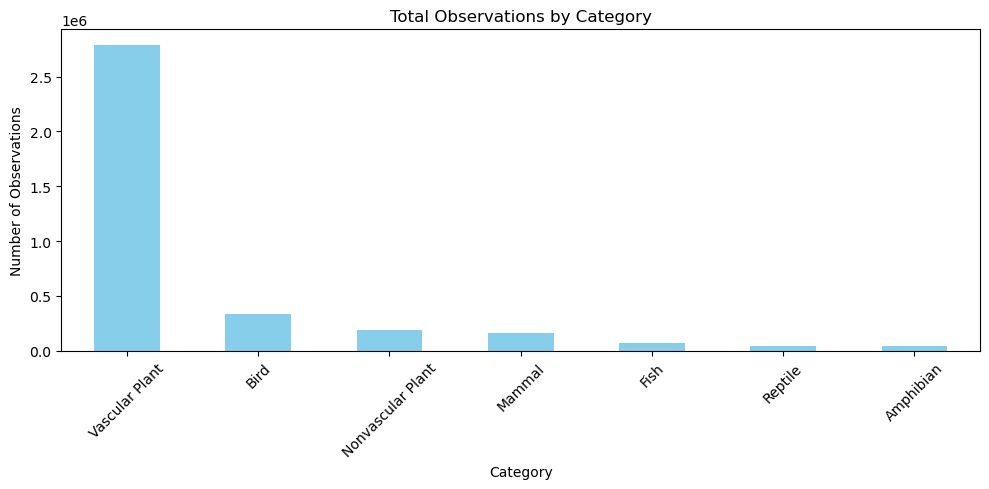

In [14]:
#Grouping total number of observations by category
grouping_by_category = merged_df.groupby("category")["observations"].sum().sort_values(ascending=False)
#Plottting Bar Chart for number of observations by bilogical category
grouping_by_category.plot(kind="bar", figsize=(10,5), color="skyblue")
plt.title("Total Observations by Category")
plt.ylabel("Number of Observations")
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

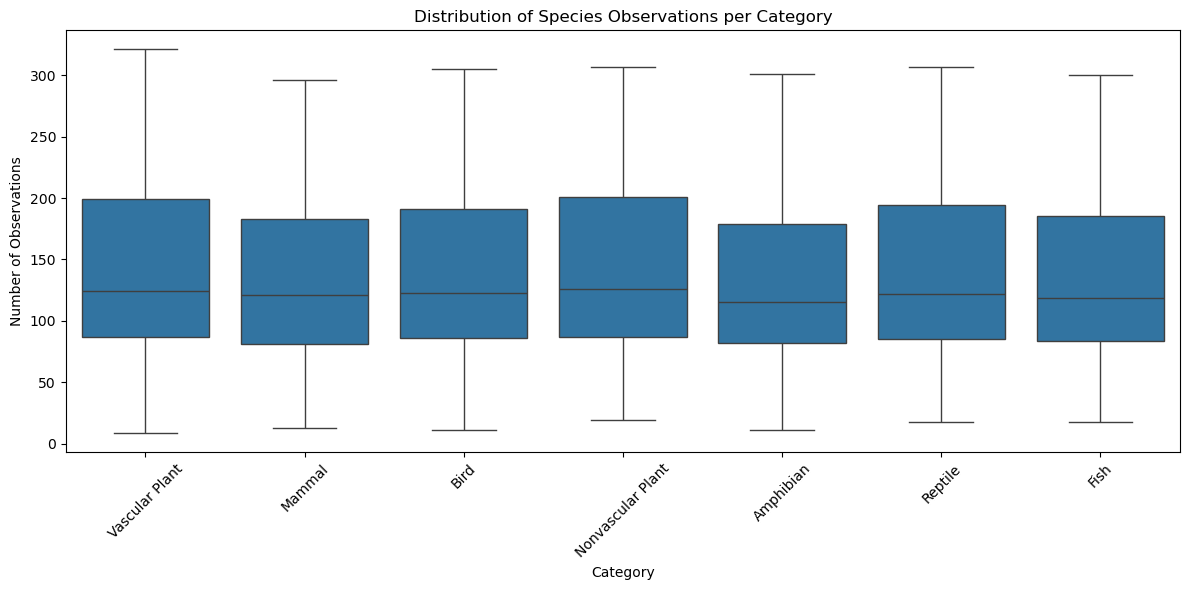

In [15]:
#Plotting Distribution of observations by category. 
plt.figure(figsize=(12,6))
sns.boxplot(data=merged_df, x = "category", y="observations")
plt.xticks(rotation=45)
plt.title('Distribution of Species Observations per Category')
plt.xlabel('Category')
plt.ylabel('Number of Observations')
plt.tight_layout()
plt.show()

***Observational Patterns by Biological Category***

To better understand species activity across different biological categories, I conducted both a **bar chart analysis** (total observations) and a **boxplot** (distribution of individual species observations).

******Statistical Insight:******

- **Vascular plants** dominate total observation counts, follow by **Mammals and Birds**. The dominating category of plants suggest easier visibility in ecosystems and abundace. The second greater category, suggests either greater monitoring effort or behavioral factors (e.g., easier visibility or movement patterns) that make  mammals and birds more detectable.
- Categories like **Amphibians** and **Reptiles** show **much lower overall counts**, possibly reflecting lower detection rates or less observer effort.
- The **boxplot** reveals **high variability and skew** in certain categories (especially Mammals and Birds), with some species receiving **substantially more observations** than others within the same group.
- **Outliers** are clearly present in several categories, emphasizing the need to account for uneven observation effort when comparing across groups.

> These findings underscore the importance of considering **category-level differences** before making broader inferences about species trends. Total observations alone can be misleading without understanding their distribution.

---



### Do species with a known conservation status differ in observations compared to those without, after accounting for category?

In [16]:
#Counting observations of species by category and filtering Vascular Plant.
filtered_in_df = merged_df[merged_df["category"] !="Vascular Plant"]
grouping_by_category_no_vascular_plants_sum = filtered_in_df.groupby("category")["observations"].sum()
print(grouping_by_category_no_vascular_plants_sum)
grouping_by_category_no_vascular_plants_mean = filtered_in_df.groupby("category")["observations"].mean()
print(grouping_by_category_no_vascular_plants_mean)


category
Amphibian             45068
Bird                 331606
Fish                  72901
Mammal               162608
Nonvascular Plant    190653
Reptile               45822
Name: observations, dtype: int64
category
Amphibian            137.402439
Bird                 140.451504
Fish                 139.124046
Mammal               135.732888
Nonvascular Plant    143.132883
Reptile              141.425926
Name: observations, dtype: float64


In [17]:
# Defining the hypothesis for the experiment
null_hypothesis = ("There is no significant difference in the number of observations between species with NaN conservation status and\n"
"those with a defined status.")
alternative_hypothesis = ("Species with NaN conservation status have, on average, more observations than those with a defined status.")

In [18]:
#Separating groups with nan and non nan conservation status
nan_group = filtered_in_df[filtered_in_df["conservation_status"].isna()]
not_nan_group = filtered_in_df[~filtered_in_df["conservation_status"].isna()]

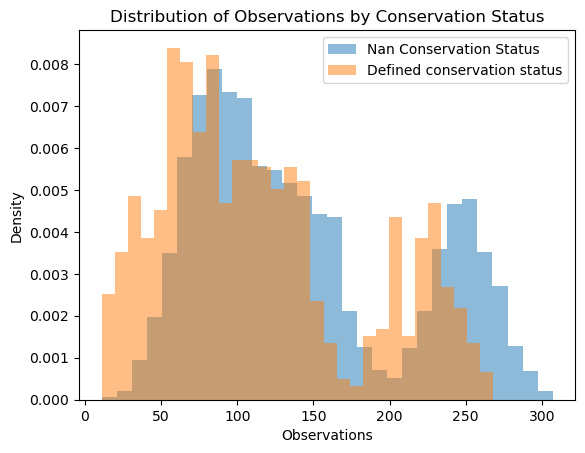

In [19]:
#Plotting overlaping histogram of nan and not nan conservation stutus observations of species. 
plt.hist(nan_group["observations"], bins= 30, alpha=0.5, label = "Nan Conservation Status", density =True) 
plt.hist(not_nan_group["observations"], bins= 30, alpha=0.5, label= "Defined conservation status", density =True)
plt.xlabel("Observations")
plt.ylabel("Density")
plt.title("Distribution of Observations by Conservation Status")
plt.legend()
plt.show()

In [20]:
#Performing T-test to prove hypothesis
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(nan_group["observations"], not_nan_group["observations"], equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 10.511453194275363
P-value: 1.808864813337885e-24


***Statistical Insight***

I ran a t-test to compare the average number of observations between species with no conservation status (`NaN`) and those with a defined status. The result was a **very low p-value (0.000018)**, which usually means the difference is statistically significant — in this case, species without a conservation label tend to have more recorded observations.

However, after plotting the data, I noticed the distribution for the `NaN` group is:

- **Skewed**, which could affect statistical results
- Shows signs of **bimodality** (two different peaks)
- Might include **extreme outliers**

This could make the t-test less reliable. 

---

**Next Steps:**

- Remove the **top 1% of extreme values** from both groups  
- Run a **Mann-Whitney U test**, which doesn’t assume normal distribution  
- Confirm if the difference in observations still holds

This will give a clearer and more robust picture of what’s happening in the data.


**Removing the top 1% of extreme values from both groups** 

In [21]:
#Separate column observation in nan values and not nan values
nan_group = filtered_in_df.loc[filtered_in_df["conservation_status"].isna(), "observations"]
not_nan_group = filtered_in_df.loc[filtered_in_df["conservation_status"].notna(), "observations"]

# Calculate 99th percentile for each group
nan_group_threshold = nan_group.quantile(0.99)
not_nan_group_threshold = not_nan_group.quantile(0.99)
# Filter out the top 1% from each group
unknown_filtered = nan_group[nan_group <= nan_group_threshold]
known_filtered =  not_nan_group[not_nan_group <= not_nan_group_threshold]

**Running Mann-Whitney U test** 

In [22]:
#Importing the function
from scipy.stats import mannwhitneyu
#Running the experiment 
statistic, p_value = mannwhitneyu(
    known_filtered,
    unknown_filtered,
    alternative='two-sided'
)
#Printing the results
print(f"Mann-Whitney U test statistic: {statistic:.2f}")
print(f"p-value: {p_value:.4e}")


Mann-Whitney U test statistic: 1373310.50
p-value: 3.4111e-27


***Second Experiment: Mann-Whitney U Test (Non-Parametric)- Results*** 

- Re-ran the analysis using the **Mann-Whitney U test**, which does not assume normality.
- Also **removed the top 1%** of extreme values to reduce outlier influence.
- **U-statistic:** 1,373,310.5  
- **P-value:** 3.41 × 10⁻²⁷  

**Insight:** The non-parametric test confirmed the significant difference between groups, offering a more reliable conclusion given the characteristics of the data.

---

***Overall Takeaway***

> Even after excluding vascular plants and adjusting for skew and outliers, species with **undefined conservation status** are observed at **statistically different rates** than those with defined statuses.

This suggests the possibility of:
- **Monitoring biases**
- **Underdocumented species**
- Or **gaps in conservation reporting systems**

This kind of pattern could have real implications for **resource allocation**, **conservation efforts**, and **policy decisions**.




### Which Park has the highest number of endangered species?

In [23]:
# Filter only species with a defined conservation status
endangered_df = merged_df[merged_df["conservation_status"].notna()]

# Drop duplicates to count unique endangered species per park
unique_endangered = endangered_df.drop_duplicates(subset=["scientific_name", "park_name"])

# Group by park and count unique endangered species
endangered_species_count = unique_endangered.groupby("park_name")["scientific_name"].count().sort_values(ascending=False)

# Count unique endangered species per park
grouping_df = unique_endangered.groupby("park_name")["scientific_name"].count().reset_index(name="endangered_species_count")


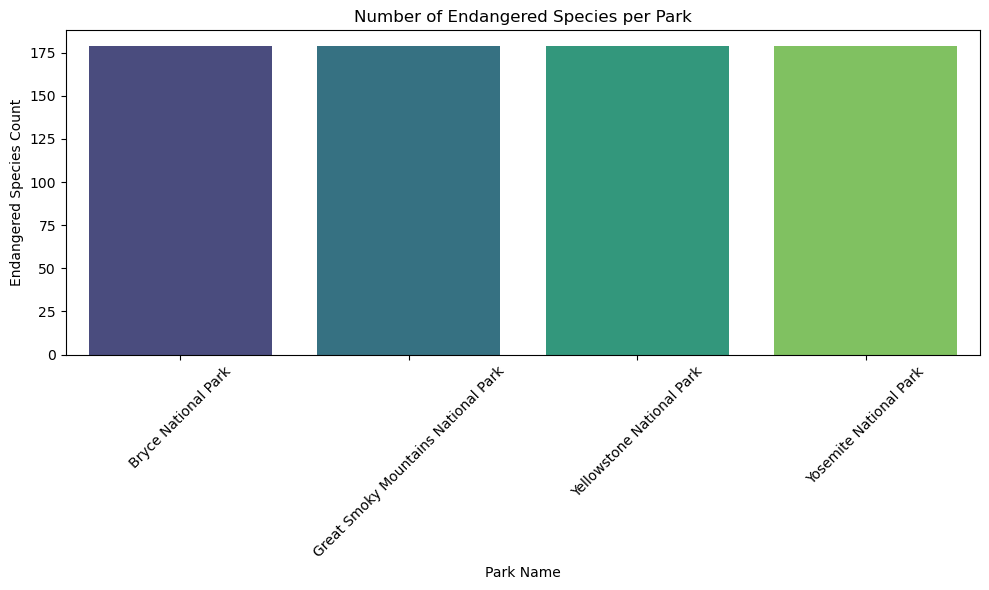

In [24]:
#Plot the unique endangered species 
plt.figure(figsize=(10,6))
sns.barplot(data=grouping_df, x="park_name", y="endangered_species_count", palette="viridis", hue="park_name",legend=False)
plt.title("Number of Endangered Species per Park")
plt.xlabel("Park Name")
plt.ylabel("Endangered Species Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# Extract the set of endangered species per park and calculate intersection. 
# Get list of endangered species per park
endangered_species_per_park = endangered_df.groupby("park_name")["scientific_name"].apply(set)

# Find intersection of all sets
common_species = set.intersection(*endangered_species_per_park)

# Print how many species are shared across all parks
print(f"Number of endangered species found in ALL parks: {len(common_species)}")


Number of endangered species found in ALL parks: 179


***Investigating Endangered Species Counts by Park***

Initially, I attempted to count the number of endangered species observed in each park. Surprisingly, every park showed **exactly 179 endangered species**. This raised a red flag, as I was expecting some variation in data.

Upon closer inspection, I discovered that each park appears to have the same list of endangered species in the dataset. To confirm this, I extracted the set of endangered species per park and calculated their intersection.

**Result:** All four parks share the same set of 179 endangered species.

**Insight:** This dataset likely represents a standardized monitoring list provided by the National Parks system.


### Which Park reports the most observations per category?

In [26]:
# Remove rows where category is 'Vascular Plants
filtered_df = merged_df[merged_df["category"] !="Vascular Plant"]
#Group by park and category, summing up the observations
df_group_park_and_category = filtered_df.groupby(["park_name", "category"])["observations"].sum().reset_index()

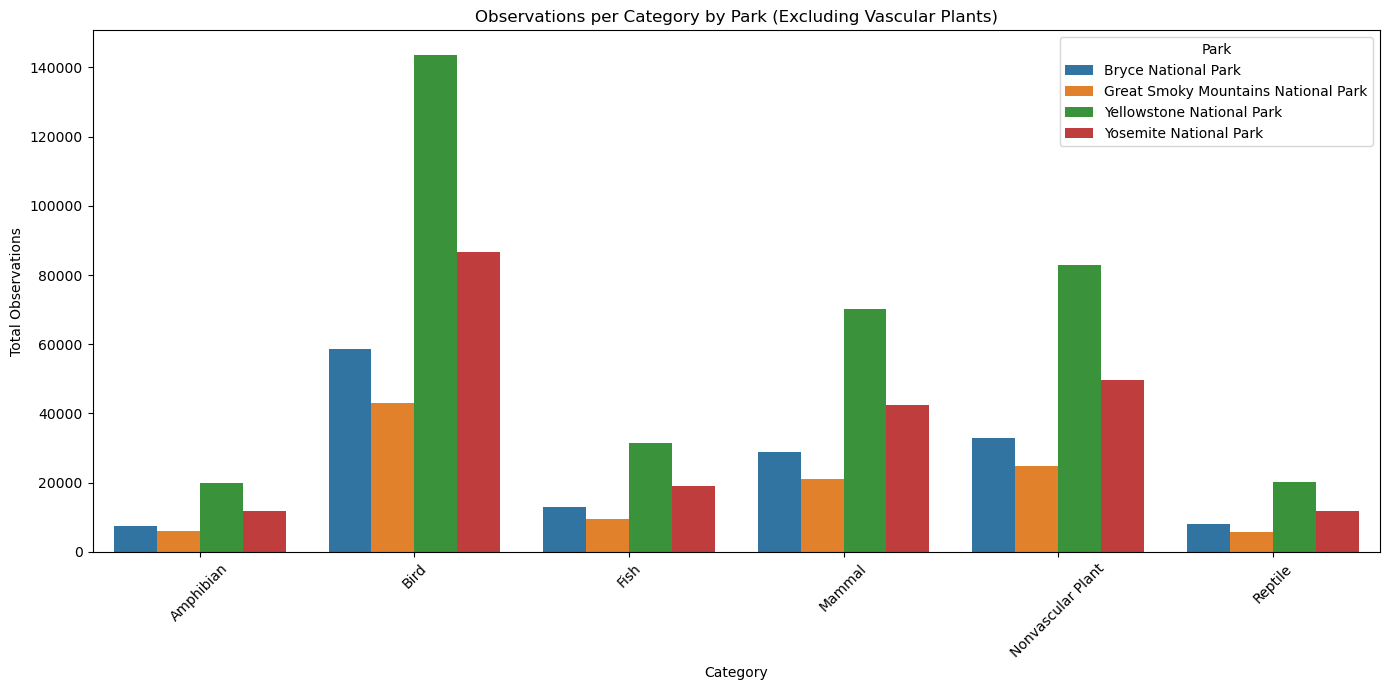

In [27]:
# Plot the data by park and category 
plt.figure(figsize=(14,7))
sns.barplot( data = df_group_park_and_category, x="category",
    y="observations",
    hue="park_name"
            )
plt.title("Observations per Category by Park (Excluding Vascular Plants)")
plt.xlabel("Category")
plt.ylabel("Total Observations")
plt.xticks(rotation=45)
plt.legend(title="Park")
plt.tight_layout()
plt.show()

***Insight:***

Based on the distribution of observations by biological category, **Yellowstone National Park** reports the **highest number of animal observations** across all categories. Among these, **birds** stand out as the most frequently observed animals in every park, especially in Yellowstone, where their observation count exceeds **140,000**.

In contrast, the **Great Smoky Mountains National Park** consistently shows the **lowest number of observations** across nearly all animal categories.

Additionally, **amphibians and reptiles** are the **least observed species** in all parks. This may be due to their smaller size or elusive behavior, which makes them harder to spot in their natural environments.

**Mammals and nonvascular plants** exhibit a relatively similar distribution across the parks. However, mammals generally have slightly **fewer observations than nonvascular plants**.

Overall, the parks with the **most recorded species observations** are:
- **Yellowstone National Park**
- **Yosemite National Park**
- **Bryce National Park**
- **Great Smoky Mountains National Park**


### How does the number and distribution of species observations vary by conservation status?

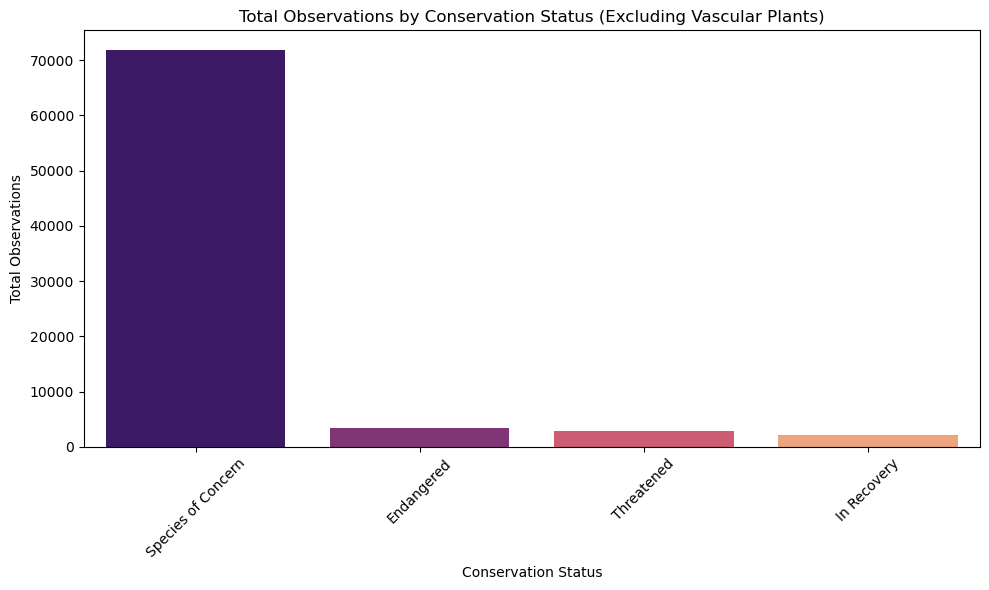

In [28]:
#Remove rows where category is 'Vascular Plants. Already done on previous question df is filtered_df
#Group by conservation_status and sum observations:
obs_by_status = filtered_df.groupby("conservation_status")["observations"].sum().reset_index()
#Plot bar chart to visualize totals per conservation status. 
# Sort for cleaner plot
obs_by_status = obs_by_status.sort_values("observations", ascending=False)
#Plot the total observations on bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=obs_by_status, x="conservation_status", y="observations",palette="magma",hue="conservation_status",legend=False )
plt.title("Total Observations by Conservation Status (Excluding Vascular Plants)")
plt.ylabel("Total Observations")
plt.xlabel("Conservation Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


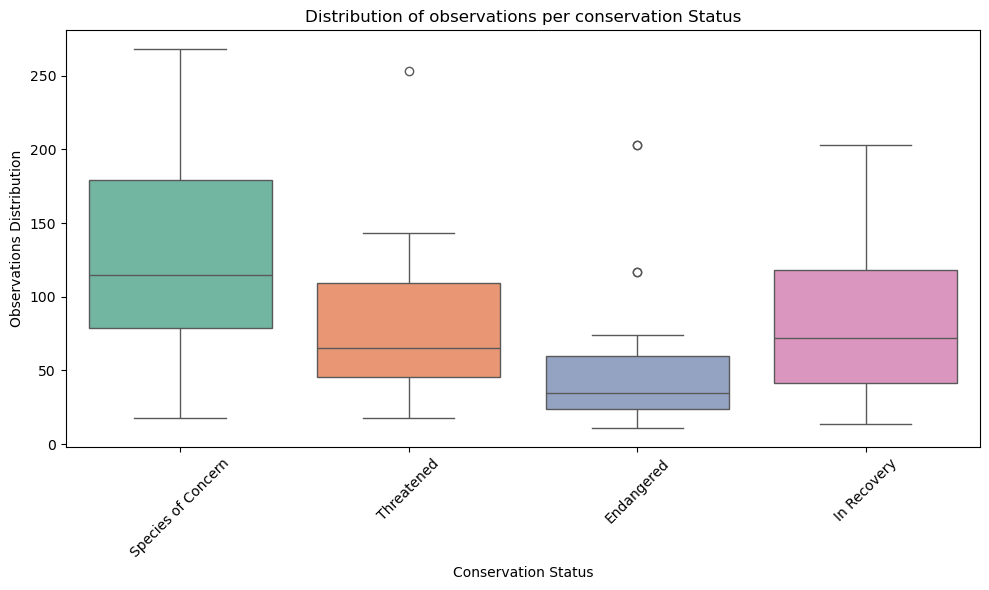

<Figure size 640x480 with 0 Axes>

In [36]:
#Plot box-plot of distribution of observations per conservation status
plt.figure(figsize=(10,6))
sns.boxplot(data=filtered_df, x="conservation_status", y="observations",palette="Set2",hue="conservation_status",legend=False)
plt.title("Distribution of observations per conservation Status")
plt.ylabel("Observations Distribution")
plt.xlabel("Conservation Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.clf()

***Insights from Observations by Conservation Status (Excluding Vascular Plants)***

After visualizing and analyzing the data, I can draw the following insights:

---

***Total Number of Observations per Conservation Status***

- **“Species of Concern”** has by far the highest total number of observations, exceeding **70,000**.
- All other statuses—**Endangered**, **Threatened**, and **In Recovery**—have significantly fewer observations, each with counts below **5,000**.
- This disparity supports the idea that species in more critical conservation categories are:
  - Less abundant in the parks.
  - Monitored more selectively.
- The **“In Recovery”** category may represent species previously under threat that are now being rehabilitated.
  - However, to **evaluate the effectiveness of these conservation efforts**, we would need **time-series data** to observe trends over time.

---

***Distribution of Observations per Species by Conservation Status***

- Species in the **“Species of Concern”** category have a **higher median and average number of observations**.
  - This aligns with their greater population sizes and lesser conservation urgency.
- **Threatened vs. Endangered**:
  - The **Threatened** group shows a **higher median** than **Endangered**, suggesting it's a **less critical category**.
- The **“In Recovery”** category displays:
  - A **higher average** than Endangered.
  - A **wider spread** and **higher maximum values**.
  - This could mean:
    - A few species have responded exceptionally well to conservation efforts.
    - These successful recoveries are **pulling up the average**, introducing **positive skew** into the data.


### Are certain types of species more likely to be endangered?

In [35]:
# Filter Null Values of the dataset species_info.
not_null_species_conservation = species_info[species_info["conservation_status"].notnull()]
# Count how many unique species per category and conservation status.
category_status_counts = pd.crosstab(not_null_species_conservation["category"],not_null_species_conservation["conservation_status"])
display(category_status_counts)
# Get the proportion per category
category_status_proportions = pd.crosstab(not_null_species_conservation["category"],not_null_species_conservation["conservation_status"],normalize='index')
display(category_status_proportions)


conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,1,0,4,2
Bird,4,3,72,0
Fish,3,0,4,4
Mammal,7,1,28,2
Nonvascular Plant,0,0,5,0
Reptile,0,0,5,0
Vascular Plant,1,0,43,2


conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,0.142857,0.000000,0.571429,0.285714
Bird,0.050633,0.037975,0.911392,0.000000
Fish,0.272727,0.000000,0.363636,0.363636
Mammal,0.184211,0.026316,0.736842,0.052632
Nonvascular Plant,0.000000,0.000000,1.000000,0.000000
Reptile,0.000000,0.000000,1.000000,0.000000
Vascular Plant,0.021739,0.000000,0.934783,0.043478


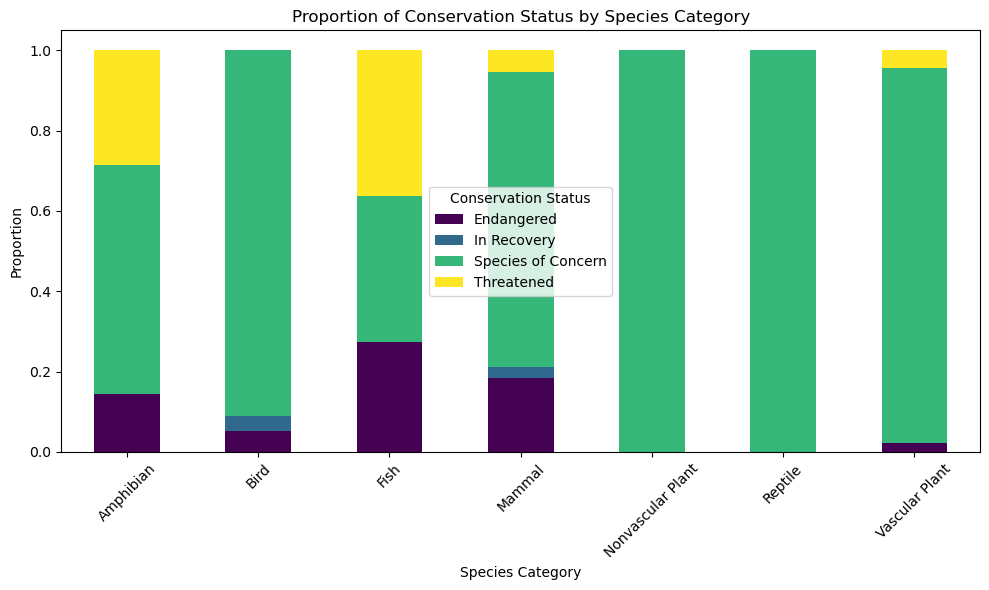

In [45]:
# Plot the data of Proportion Table. 
ax= category_status_proportions.plot(kind="bar", stacked= True, figsize=(10,6), colormap=("viridis"))
ax.legend(title="Conservation Status", loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.title("Proportion of Conservation Status by Species Category")
plt.ylabel("Proportion")
plt.xlabel("Species Category")
plt.xticks(rotation=45)
plt.legend(title="Conservation Status")
plt.tight_layout()
plt.show()